In [1]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, neighbors
from sklearn import tree, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
df_x = pd.read_csv('X_testrdf.csv')
df_x.to_csv('X_test2rdf.csv', index=True)

In [3]:
df_x = pd.read_csv('X_test2rdf.csv')
df_x

,Unnamed: 0,Unnamed: 0.1,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,0,5106,0.000656,-0.011321,0.003514,-0.004112,0.022805,-0.023889,-0.000893,0.005252,...,0.018394,0.009992,0.000488,-0.012467,0.021218,0.017015,-0.012274,-0.023248,-0.028914,-0.003647
1,1,2186,-0.008824,-0.022924,0.009145,-0.004673,0.021556,-0.022536,-0.011412,-0.002117,...,0.031519,0.019037,-0.001674,-0.020643,0.028571,0.038223,-0.021811,-0.038973,-0.045581,-0.014937
2,2,2589,-0.014834,-0.027600,0.013113,-0.000872,0.012651,-0.040131,-0.019315,-0.010987,...,0.031405,0.013538,0.004621,-0.022881,0.022766,0.040415,-0.034823,-0.039502,-0.030211,-0.008242
3,3,831,-0.021160,-0.036385,0.007282,-0.001310,0.026375,-0.042277,-0.027584,-0.010982,...,0.023445,0.004233,0.012941,-0.015170,0.028709,0.026525,-0.017741,-0.020952,-0.034973,-0.008897
4,4,1421,-0.012354,-0.026742,0.001006,-0.009123,0.025933,-0.018638,-0.016739,-0.003600,...,0.028185,0.014422,0.004963,-0.019166,0.024182,0.031578,-0.026553,-0.032305,-0.036891,-0.009898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1535,1942,-0.023304,-0.028802,0.012766,-0.005176,0.027534,-0.040991,-0.020489,0.004659,...,0.023199,0.007082,0.001299,-0.015719,0.027378,0.022127,-0.015291,-0.034941,-0.025766,-0.006898
1536,1536,174,-0.016041,-0.032568,0.013148,-0.010314,0.040169,-0.040286,-0.022824,0.010775,...,0.017151,0.007579,0.000812,-0.010454,0.030197,0.018389,-0.004380,-0.033672,-0.028313,-0.008427
1537,1537,3434,-0.008210,-0.017858,-0.001666,0.002421,0.026023,-0.031937,-0.014762,0.001660,...,0.014423,0.006689,0.004170,-0.006146,0.016075,0.009264,-0.003465,-0.015204,-0.016633,0.003215
1538,1538,4269,-0.015294,-0.027877,-0.003552,-0.011013,0.027806,-0.017021,-0.017628,0.000865,...,0.026873,0.015186,-0.008285,-0.016261,0.018142,0.034185,-0.022243,-0.032112,-0.032646,-0.014132


In [4]:
df_y = pd.read_csv('y_predrdf.csv')
df_y

,Unnamed: 0,0
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
1535,1535,0
1536,1536,0
1537,1537,0
1538,1538,1


In [5]:
pred = df_x.merge(df_y, on='Unnamed: 0')
pred

,Unnamed: 0,Unnamed: 0.1,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y,0
0,0,5106,0.000656,-0.011321,0.003514,-0.004112,0.022805,-0.023889,-0.000893,0.005252,...,0.009992,0.000488,-0.012467,0.021218,0.017015,-0.012274,-0.023248,-0.028914,-0.003647,1
1,1,2186,-0.008824,-0.022924,0.009145,-0.004673,0.021556,-0.022536,-0.011412,-0.002117,...,0.019037,-0.001674,-0.020643,0.028571,0.038223,-0.021811,-0.038973,-0.045581,-0.014937,0
2,2,2589,-0.014834,-0.027600,0.013113,-0.000872,0.012651,-0.040131,-0.019315,-0.010987,...,0.013538,0.004621,-0.022881,0.022766,0.040415,-0.034823,-0.039502,-0.030211,-0.008242,1
3,3,831,-0.021160,-0.036385,0.007282,-0.001310,0.026375,-0.042277,-0.027584,-0.010982,...,0.004233,0.012941,-0.015170,0.028709,0.026525,-0.017741,-0.020952,-0.034973,-0.008897,0
4,4,1421,-0.012354,-0.026742,0.001006,-0.009123,0.025933,-0.018638,-0.016739,-0.003600,...,0.014422,0.004963,-0.019166,0.024182,0.031578,-0.026553,-0.032305,-0.036891,-0.009898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1535,1942,-0.023304,-0.028802,0.012766,-0.005176,0.027534,-0.040991,-0.020489,0.004659,...,0.007082,0.001299,-0.015719,0.027378,0.022127,-0.015291,-0.034941,-0.025766,-0.006898,0
1536,1536,174,-0.016041,-0.032568,0.013148,-0.010314,0.040169,-0.040286,-0.022824,0.010775,...,0.007579,0.000812,-0.010454,0.030197,0.018389,-0.004380,-0.033672,-0.028313,-0.008427,0
1537,1537,3434,-0.008210,-0.017858,-0.001666,0.002421,0.026023,-0.031937,-0.014762,0.001660,...,0.006689,0.004170,-0.006146,0.016075,0.009264,-0.003465,-0.015204,-0.016633,0.003215,0
1538,1538,4269,-0.015294,-0.027877,-0.003552,-0.011013,0.027806,-0.017021,-0.017628,0.000865,...,0.015186,-0.008285,-0.016261,0.018142,0.034185,-0.022243,-0.032112,-0.032646,-0.014132,1


In [6]:
pred = pred[['1_x','2_x','1_y','2_y', '0']]
pred

,1_x,2_x,1_y,2_y,0
0,0.000656,-0.011321,-0.011850,-0.028924,1
1,-0.008824,-0.022924,-0.020862,-0.043554,0
2,-0.014834,-0.027600,-0.019103,-0.045005,1
3,-0.021160,-0.036385,-0.015431,-0.022445,0
4,-0.012354,-0.026742,-0.025714,-0.044501,0
...,...,...,...,...,...
1535,-0.023304,-0.028802,-0.010628,-0.026637,0
1536,-0.016041,-0.032568,-0.017681,-0.030409,0
1537,-0.008210,-0.017858,-0.010796,-0.018893,0
1538,-0.015294,-0.027877,-0.011270,-0.037378,1


In [7]:
pred_filtered = pred[pred['0'] == 1]
pred_filtered

,1_x,2_x,1_y,2_y,0
0,0.000656,-0.011321,-0.011850,-0.028924,1
2,-0.014834,-0.027600,-0.019103,-0.045005,1
5,-0.023815,-0.023938,-0.027198,-0.024931,1
6,-0.015153,-0.030130,-0.021885,-0.035450,1
7,-0.021775,-0.038277,-0.015442,-0.031094,1
...,...,...,...,...,...
1527,-0.027635,-0.031653,-0.016913,-0.035995,1
1530,-0.003532,-0.009539,-0.013729,-0.021998,1
1533,-0.015659,-0.017158,-0.008423,-0.028532,1
1534,-0.014244,-0.031376,-0.022699,-0.039797,1


In [8]:
embedding_df = pd.read_csv('RDF2Vec Ready.csv')
embedding_df

,Unnamed: 0,uri,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,http://halal.addi.is.its.ac.id/manufactures/Je...,-0.009982,-0.010785,0.001290,-0.002210,0.012950,-0.014055,-0.009258,0.002966,...,0.002688,0.001218,0.002677,-0.004382,0.008542,0.016461,-0.004507,-0.009144,-0.017365,-0.003578
1,1,http://halal.addi.is.its.ac.id/manufactures/Am...,0.001167,-0.009434,0.000645,-0.001031,0.008766,-0.000232,-0.008129,0.005552,...,0.003313,0.004367,0.006992,-0.005176,-0.003665,0.001302,-0.007643,-0.004331,-0.007680,0.000269
2,2,http://halal.addi.is.its.ac.id/manufactures/St...,-0.002369,-0.013097,0.002923,-0.011869,0.007506,-0.008881,-0.008147,0.002153,...,0.009371,0.006710,0.008013,-0.005424,0.010427,0.012458,-0.009169,-0.003693,-0.007440,-0.002895
3,3,http://halal.addi.is.its.ac.id/manufactures/Li...,-0.001649,-0.005344,-0.003339,-0.005358,-0.001656,0.002563,-0.005313,-0.002229,...,-0.000795,-0.000445,0.003015,0.000822,-0.003762,0.007071,-0.006090,0.000607,0.000325,0.000925
4,4,http://halal.addi.is.its.ac.id/manufactures/Yi...,0.002971,-0.004289,-0.001187,-0.002908,0.000447,-0.001315,-0.005677,-0.002215,...,0.005115,0.004029,-0.003079,-0.003695,-0.002872,0.003256,-0.002444,-0.001074,-0.000400,-0.003808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21232,21232,http://halal.addi.is.its.ac.id/manufactures/Pf...,-0.015791,-0.016935,0.000231,-0.002209,0.015589,-0.019267,-0.013298,0.003206,...,0.008705,0.009454,0.003483,-0.006225,0.009099,0.015249,-0.013845,-0.000098,-0.022265,0.001284
21233,21233,http://halal.addi.is.its.ac.id/manufactures/Te...,0.004632,-0.003782,0.004087,-0.002548,0.013088,-0.005177,-0.008472,-0.003216,...,0.012949,0.012496,-0.000363,-0.004499,0.002768,0.005954,-0.015915,-0.008941,-0.008630,-0.004899
21234,21234,http://halal.addi.is.its.ac.id/manufactures/By...,0.004317,-0.004459,0.001513,-0.001362,0.008050,-0.010236,-0.001776,-0.002006,...,0.009008,0.004254,-0.003833,-0.006258,-0.000842,0.011535,-0.012161,-0.005507,-0.001593,-0.000905
21235,21235,http://halal.addi.is.its.ac.id/manufactures/My...,-0.003378,-0.014259,0.000830,-0.001121,0.007841,-0.007457,-0.013431,0.004210,...,0.008928,-0.000022,-0.002112,-0.002604,0.004747,0.009997,-0.007762,-0.016962,-0.007368,-0.003753


In [9]:
mix = pred_filtered.merge(embedding_df, left_on='1_x', right_on='1').merge(embedding_df, left_on='1_y', right_on='1')
mix

,1_x,2_x,1_y,2_y,0,Unnamed: 0_x,uri_x,1_x,2_x,3_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,0.000656,-0.011321,-0.009398,-0.003699,1,1725,http://halal.addi.is.its.ac.id/foodproducts/In...,0.000656,-0.011321,0.003514,...,0.005757,0.004883,-0.000590,-0.004939,0.015547,0.002727,0.009571,-0.010091,-0.020871,-0.002756
1,-0.020797,-0.046663,-0.009398,-0.003699,1,1525,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.020797,-0.046663,0.015033,...,0.005757,0.004883,-0.000590,-0.004939,0.015547,0.002727,0.009571,-0.010091,-0.020871,-0.002756
2,-0.024036,-0.039491,-0.009398,-0.003699,1,1682,http://halal.addi.is.its.ac.id/foodproducts/In...,-0.024036,-0.039491,0.007118,...,0.005757,0.004883,-0.000590,-0.004939,0.015547,0.002727,0.009571,-0.010091,-0.020871,-0.002756
3,0.000656,-0.011321,-0.020961,-0.039238,1,1725,http://halal.addi.is.its.ac.id/foodproducts/In...,0.000656,-0.011321,0.003514,...,0.018489,0.015805,0.004112,-0.014206,0.024191,0.026165,-0.011957,-0.034274,-0.034130,-0.010366
4,0.000656,-0.011321,-0.020797,-0.046663,1,1725,http://halal.addi.is.its.ac.id/foodproducts/In...,0.000656,-0.011321,0.003514,...,0.033743,0.008515,0.005891,-0.022097,0.038499,0.030400,-0.015441,-0.036964,-0.042786,-0.011083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.015464,-0.028786,-0.017911,-0.030015,1,5307,http://halal.addi.is.its.ac.id/foodproducts/Bi...,-0.015464,-0.028786,0.008768,...,0.014289,0.001292,-0.000350,-0.012421,0.025742,0.015967,-0.006315,-0.028252,-0.035515,-0.003649
404,-0.009942,-0.030718,-0.008457,-0.009594,1,6197,http://halal.addi.is.its.ac.id/foodproducts/Ku...,-0.009942,-0.030718,-0.003507,...,0.017982,0.002596,0.002762,-0.014018,0.015426,0.006678,-0.004028,-0.014687,-0.016641,-0.000706
405,-0.016246,-0.028347,0.001237,-0.014830,1,7026,http://halal.addi.is.its.ac.id/foodproducts/Ne...,-0.016246,-0.028347,0.009720,...,0.032076,0.015801,-0.008626,-0.012752,0.012027,0.016010,-0.019070,-0.029446,-0.032961,-0.017282
406,-0.025311,-0.039357,-0.015462,-0.023006,1,3158,http://halal.addi.is.its.ac.id/foodproducts/Ro...,-0.025311,-0.039357,0.017554,...,0.015789,0.006880,0.011312,-0.003698,0.022729,0.005097,-0.015330,-0.013739,-0.035103,0.007566


In [18]:
df = mix[['uri_x', 'uri_y']]
df
#df.to_csv('rdf2vecvisualisasi.csv')

In [19]:
df = pd.read_csv('rdf2vecvisualisasi.csv')

In [20]:
import networkx as nx
g = nx.from_pandas_edgelist(df, source='uri x',target='uri y')

In [21]:
mylist = df.values.tolist()
mylist

[[0, 'Indomie Mi Instant Rasa Soto Mie', 'Indomie Mi Rasa Ayam Special'],
 [1, 'Indomie Mi Rasa Ayam Bawang', 'Indomie Mi Rasa Ayam Special'],
 [2, 'Indomie Mi Rasa Kari Ayam', 'Indomie Mi Rasa Ayam Special'],
 [3, 'Indomie Mi Instant Rasa Soto Mie', 'Indomie Mi Goreng Rendang'],
 [4, 'Indomie Mi Instant Rasa Soto Mie', 'Indomie Mi Rasa Ayam Bawang'],
 [5, 'Indomie Mi Rasa Kari Ayam', 'Indomie Mi Rasa Ayam Bawang'],
 [6, 'Indomie Mi Instan Goreng', 'Indomie Mi Rasa Ayam Bawang'],
 [7, 'Deka Wafer Crepes Choco Banana', 'Indomie Mi Rasa Ayam Bawang'],
 [8, 'Indomie Mi Instant Rasa Soto Mie', 'Indomie Mi Goreng Rasa Sate'],
 [9, 'Indomie Mi Instan Goreng', 'Indomie Mi Goreng Rasa Sate'],
 [10, 'Indomaret Kacang Kriuk', 'Indomaret Snack Kacang Atom Shanghai'],
 [11, 'Indomaret Kacang Bumbu', 'Indomaret Snack Kacang Atom Shanghai'],
 [12, 'Indomaret Kacang Kriuk', 'Dua Kelinci Kacang Sangrai'],
 [13, 'Indomaret Kacang Bali', 'Dua Kelinci Kacang Sangrai'],
 [14, 'Indomaret Kacang Kriuk', 'Ka

In [22]:
g.add_edges_from(mylist,weight=1,label="linkedTo")
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

ValueError: dictionary update sequence element #0 has length 1; 2 is required

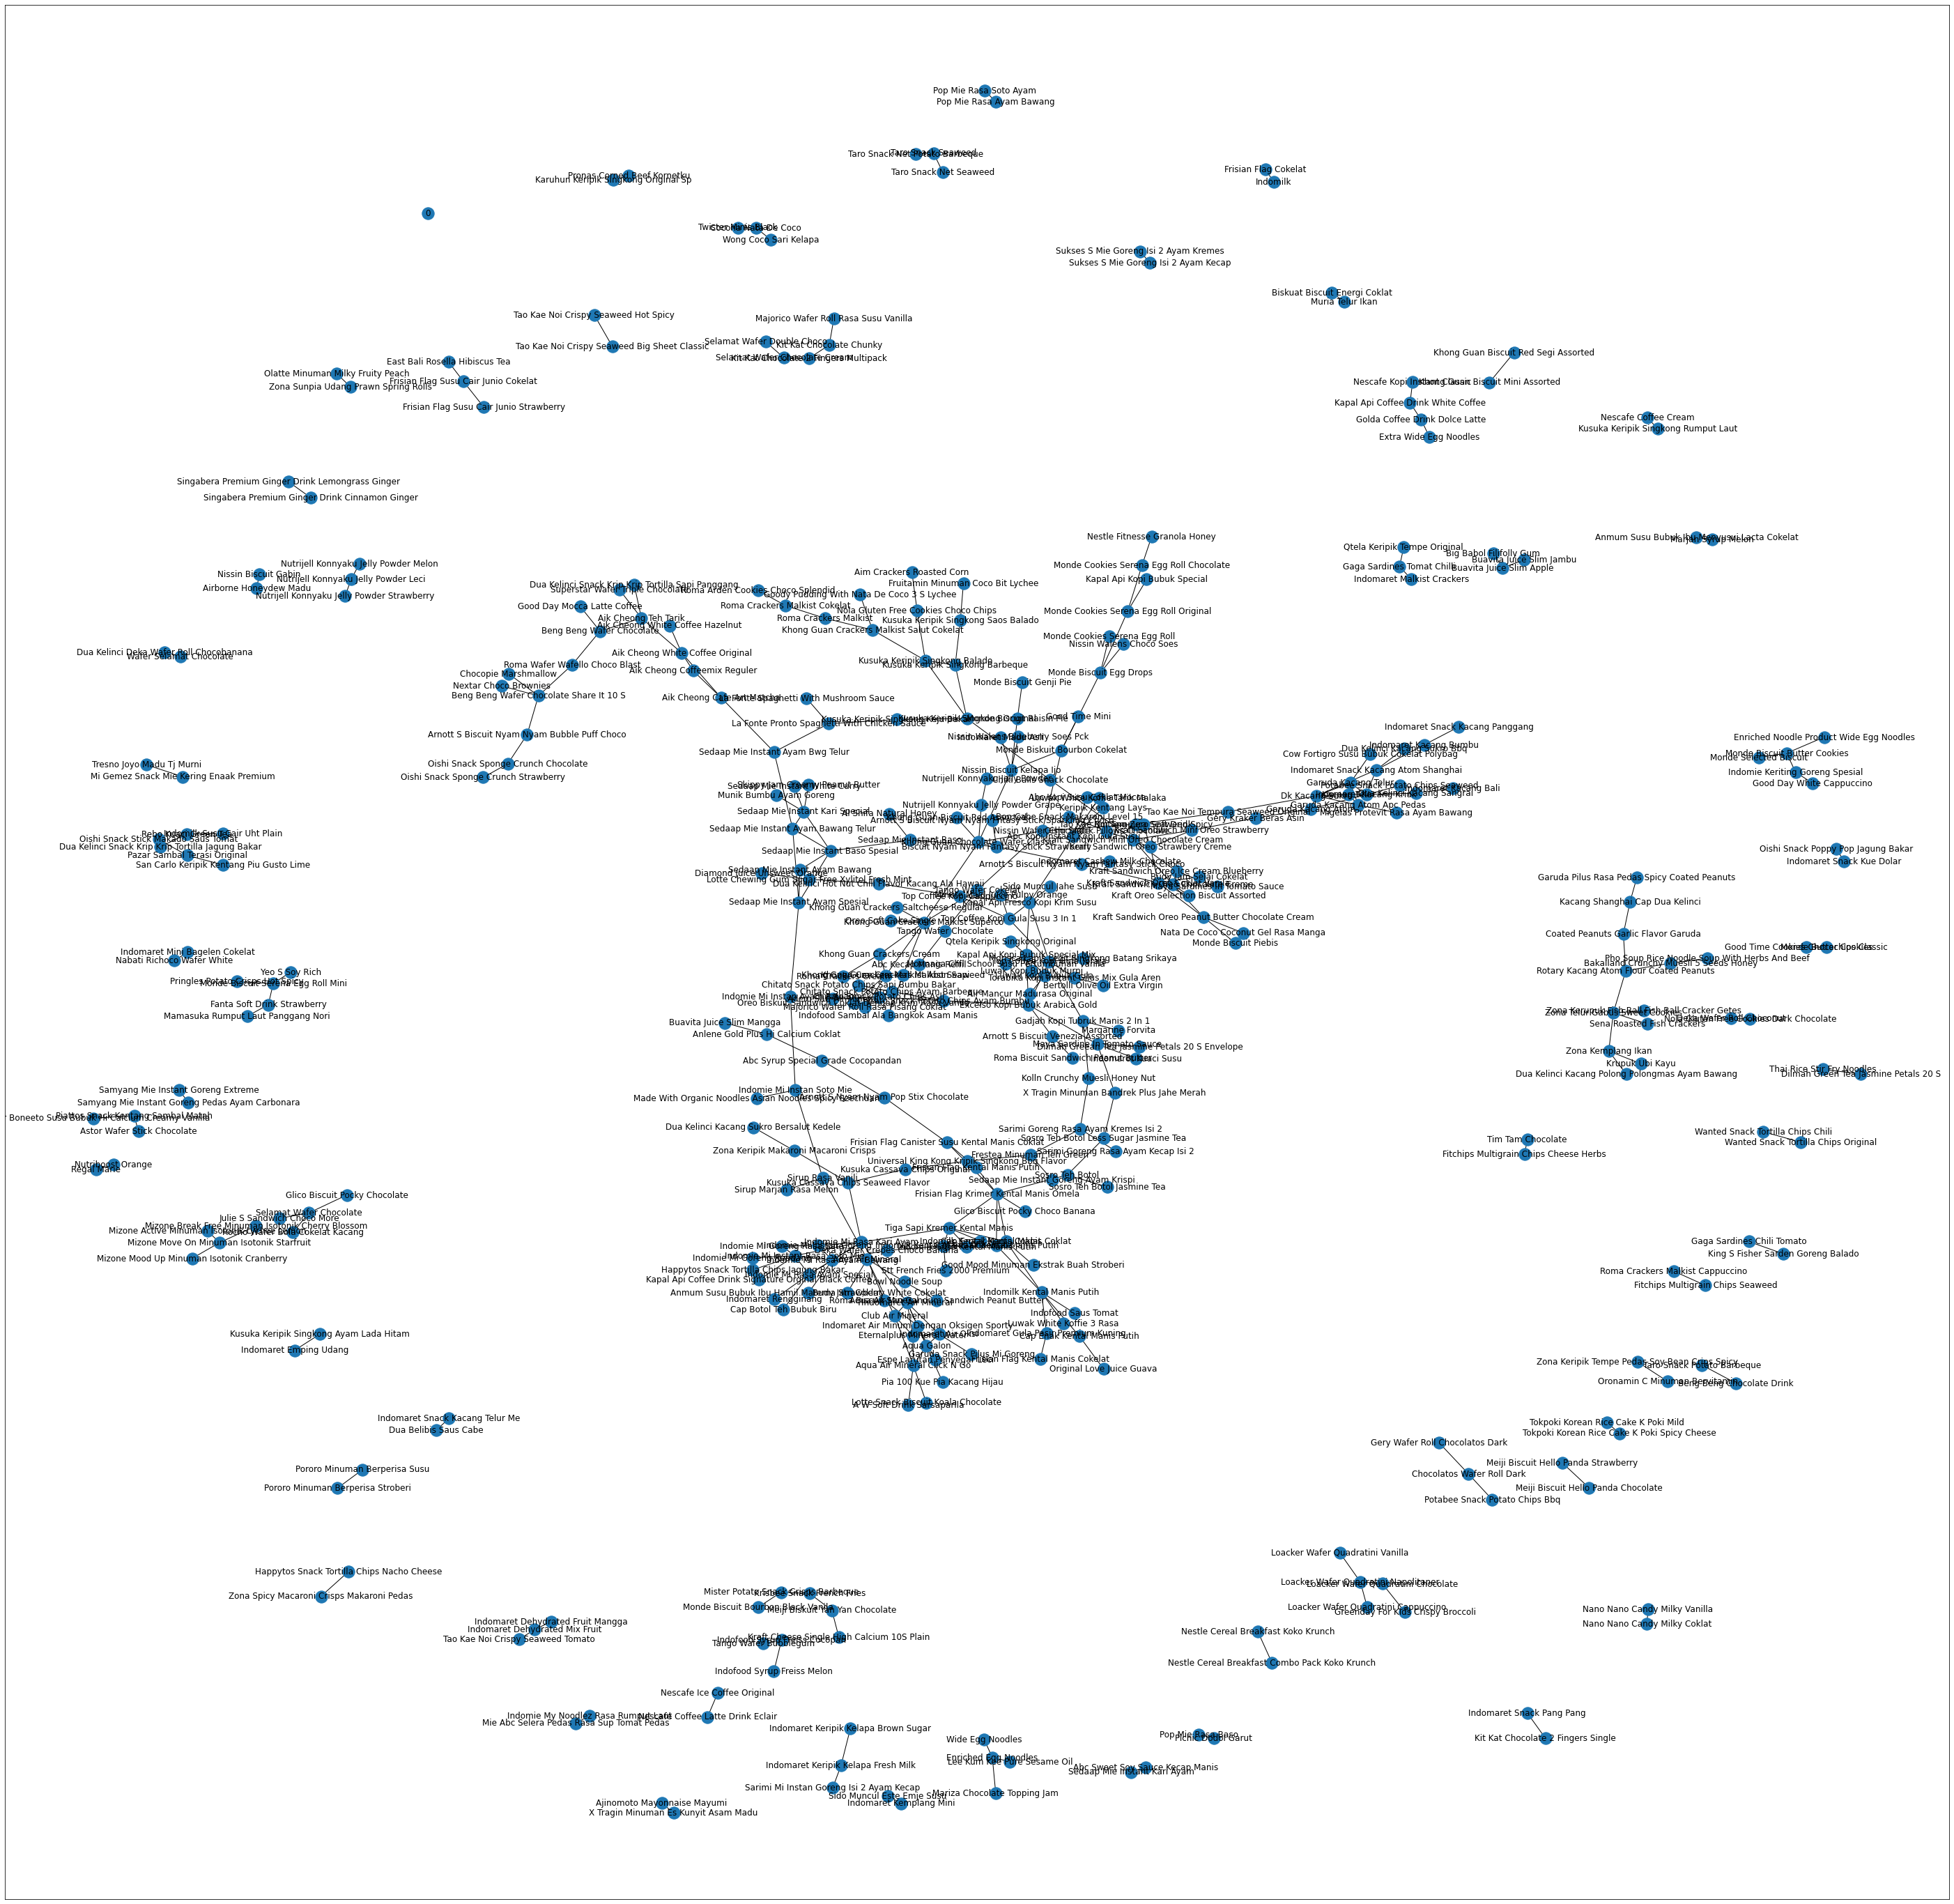

In [23]:
fig, ax = plt.subplots(figsize=(50,50))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax)
nx.draw_networkx_edges(g, layout,  ax=ax)
_ = nx.draw_networkx_labels(g, layout, ax=ax)

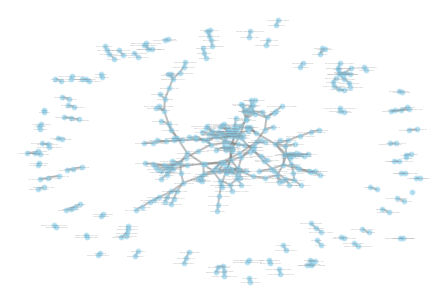

In [24]:
nx.draw(g, with_labels=True, node_size=15, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=1, 
        font_color="grey", font_weight="bold", width=2, edge_color="grey")

In [25]:
import pyvis
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(g)
net.show('example.html')